In [227]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix

In [200]:
df = pd.read_csv('titanic.csv')

In [201]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [202]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [203]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [204]:
df['Sex'].replace({'male':0, 'female':1}, inplace=True)
df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}, inplace = True)

In [205]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Sex,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292
Embarked,418.0,0.464115,0.685516,0.00,0.0000,0.0000,1.00,2.0000


In [206]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [207]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [208]:
df.drop(columns= ['Name', 'Ticket', 'Cabin'], inplace = True)

In [209]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [210]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,2
1,893,1,3,1,47.0,1,0,7.0000,0
2,894,0,2,0,62.0,0,0,9.6875,2
3,895,0,3,0,27.0,0,0,8.6625,0
4,896,1,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0,NaN,0,0,8.0500,0
414,1306,1,1,1,39.0,0,0,108.9000,1
415,1307,0,3,0,38.5,0,0,7.2500,0
416,1308,0,3,0,NaN,0,0,8.0500,0


<AxesSubplot:>

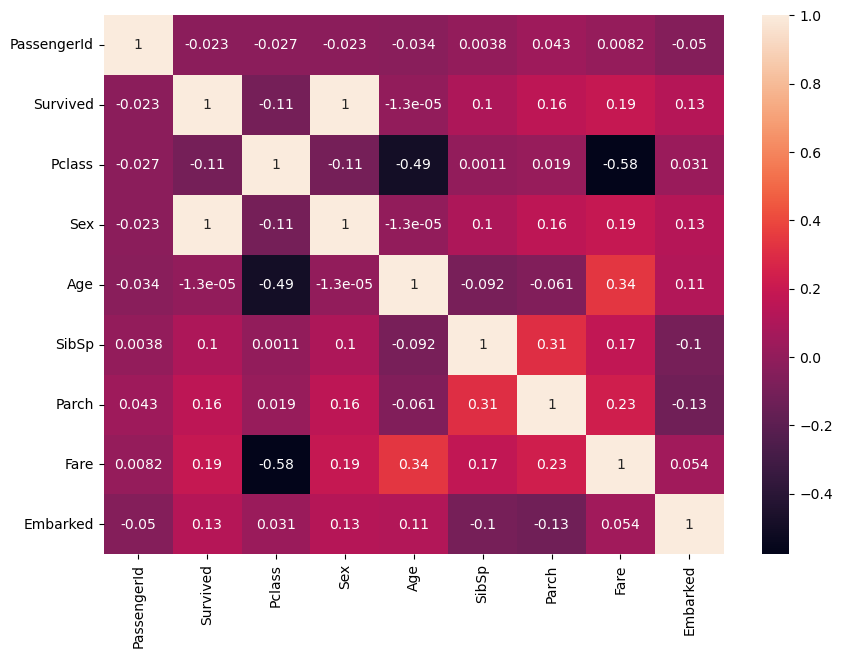

In [211]:
plt.figure(figsize = (10,7))
sns.heatmap(data = df.corr(), annot = True)

In [212]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [213]:
df.dropna(axis=0, inplace=True)

In [214]:
feature = df[['Sex', 'Fare']]

In [215]:
target = df['Survived']

In [216]:
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size=0.2)

In [217]:
log_reg = LogisticRegression()

In [218]:
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [219]:
log_reg.score(X_test, Y_test)

1.0

In [220]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
lin_reg.score(X_test, Y_test)

1.0

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

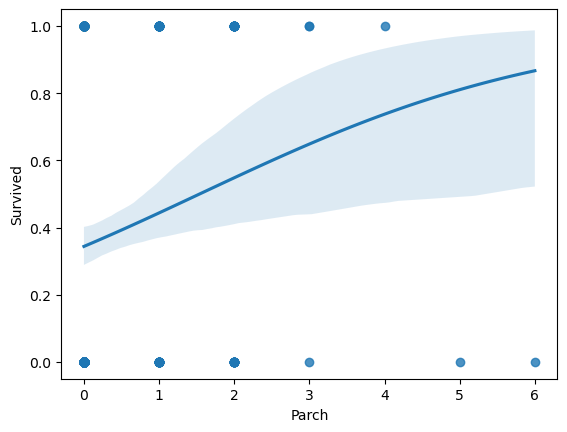

In [226]:
sns.regplot(df['Parch'], target, logistic = True)

In [228]:
Y_pred = log_reg.predict(X_test)

In [231]:
cm = confusion_matrix(Y_test, Y_pred)

In [232]:
cm

array([[51,  0],
       [ 0, 16]], dtype=int64)